<a href="https://colab.research.google.com/github/ajay152603/Python-for-DS/blob/master/4.%20Module%201%3A%20Data%20Science%20-%20Understaning%20visulization%20in%20detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Module 1: Data Science - Understaning visulization in detail

--------------------------------
**Plotting mathematical functions**


----------------------
*Statistical functions (scipy.stats)*

*   This module contains a large number of probability distributions as well as a growing library of statistical functions

*Mathematical functions (math)*


*   The math module is a standard module in Python and is always available. To use mathematical functions under this module, you have to import the module using 
-------------------







In [0]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import math as math



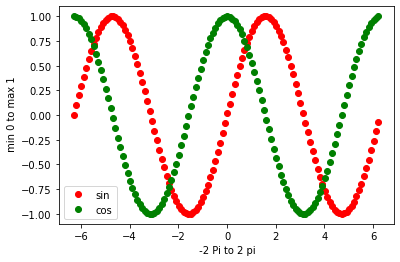

In [7]:
# Refer to the official documentation of packages 
# plot sign and cos graph in same plot

x = np.arange(-np.pi * 2,np.pi*2, 0.1)
y = np.sin(x)
plt.plot (x, y,'ro')  # we can also try go/bo/ro/r- etc for changing the representation of the points (marker)
plt.plot(x,np.cos(x),"go")
plt.legend(['sin', 'cos'])
plt.xlabel (" -2 Pi to 2 pi")
plt.ylabel (" min 0 to max 1")
plt.show()

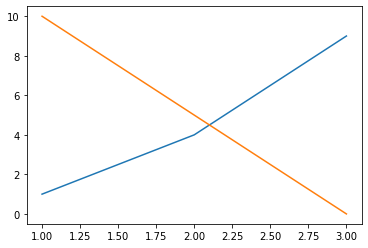

In [8]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [10, 5, 0]
plt.plot(x, y)
plt.plot(x, z)

--------------------------------
Visualizing data by loading dataframes
------------------------------------------

In [9]:
df = pd.read_csv("/content/sample_data.csv")

FileNotFoundError: ignored

In [0]:
#Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure
type(df)

In [0]:
type (df.column_c)

In [0]:
df

In [0]:
# extracting first element of the series 
df.column_c.iloc[0]


-----------------------
Visualizing data on the populations of countries
----------------------------------

In [0]:
countries = pd.read_csv("/content/countries.csv")
countries.head()

In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
countries.head(5)

In [0]:
# Compare the population growth in the US and China

In [0]:
country =countries.drop(['year'], axis = 1)
country.head(4)

In [0]:
 #Numerically comparing data 
x = country[(country.country ==  "United States") | (country.country == "China")]
x.count()
#
# df=pd.DataFrame ( countries, columns=("year",	"population"),
#  index= countries["country"])
# df.loc([['United States', 'China']])
x.groupby(['country']).sum() / 1000000 


In [0]:
us = countries[countries.country == "United States"]

In [0]:
china =countries[countries.country == 'China']

In [0]:
plt.plot (us.year,us.population/ 10**6, "oy")
plt.plot (china.year, china.population/10**6,'sc')
plt.xlabel("year")
plt.ylabel("population in million")
plt.legend ( ["US", "CHINA"])
plt.title("population trend")
plt.show()

In [0]:
# Observe the population growth
plt.plot(us.year, (us.population / us.population.iloc[0] ) * 100, 'sc')
plt.plot(china.year, china.population / china.population.iloc[0] * 100,"r")
plt.legend(['United States', 'China'])
plt.xlabel('year')
plt.ylabel('population growth (first year = 100)')
plt.show()

------------------------------
# Visualizing data on movies
---------------------------------

In [0]:
df = pd.read_csv("/content/moviesData.csv")
df.head(2)

In [0]:
df.shape

In [0]:
# Plot a histogram of the object named runtime in movies.
# A histogram is a visual representation of the distribution of a dataset.
# It is used to plot the frequency of score occurrences in a continuous dataset. 
# Observe the warning in the output 
# Slide 9 

#df["runtime"].head(3)
plt.hist(df.runtime)
plt.xticks(rotation='vertical')
plt.figure(figsize=(20,20))

In [0]:
# observe that the count of runtime is one less than 600
df.shape
df["runtime"].describe()

In [0]:
print(df.runtime.isna().sum())

In [0]:
 # Drop the na datapoints 
 y = df["runtime"].dropna()
 y.shape


In [0]:
plt.hist(df.runtime, bins = 10 , orientation= 'horizontal', color ='orange',edgecolor='red', linewidth=2) 

In [0]:
df.head(5)

In [0]:
df.genre.count()
category=df.genre.value_counts()


In [0]:
plt.pie(category)
plt.pie(category, labels=category.index.tolist())

In [0]:
df.head(4)

In [0]:
df[1:7:2]

In [0]:
# heat plot for finding corelation
plt.figure(figsize=(10,10))
mask_frame = np.zeros_like(df.corr(), dtype= np.bool)
mask_frame[np.triu_indices_from(mask_frame)]= True
sns.heatmap(df.corr())

# vmin = -1, cmap='coolwarm', annot=True, mask_frame = mask_frame

In [0]:
# imdb underscore rating and audience underscore score.
# draw a scatter plot with these two objects by using plot function.
# Scatter plot is a graph in which the values of two variables are plotted along two axes.
# The pattern of the resulting points reveals the correlation.
plt.scatter(df.imdb_rating, df.audience_score, c='y',edgecolor='red', linewidth=0.5)
# plt.scatter(movies.critics_score, movies.audience_score, c='red')
plt.xlim(0,11) # imdb varies from 0 to 10
plt.ylim(0,101) # audience varies from 0 to 100
plt.title('Scatter plot of imdb rating and audience score')
plt.show()
# Concept of correlation is needed here (intuition wise).
# Difference between auto-correlation (do not mix with correlation) 

In [0]:
# Range, quartile, information in boxplot 
# 5 parameters of box plot : min , Q1 (first quartile), Q2 (median - arrange in sequence - then mid value), Q3 (third quartile), Max value, outliers
# wiskers  
# How to deal with outliers  : formula (Q3 + IQR) : (Q3- Q1) = Inter quartile Range
plt.figure(figsize=(8,10))
df['diff'] = df['audience_score'] - df['critics_score']
chart = sns.boxplot('genre', 'diff', data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

-----------------------------------------
# Various distributions
-------------------------------------------------

-----------
Bernoulli Distribution
-----------------

In [0]:
# its basically for descrete prabobility.

# flipping a coil or out of 10 people ( 7 native + 3 internaltion) selection a native caption
#p is propability of happen of even then (1-p) will be not happening of event  E(x) = p * (1-p)   : variance( sigma **2)  = p * (1-p)
#X - bern(p)  --> should be read as : variable x follows as bernaulli distribution with a probability of success equal to p 


(0.0, 1.0)

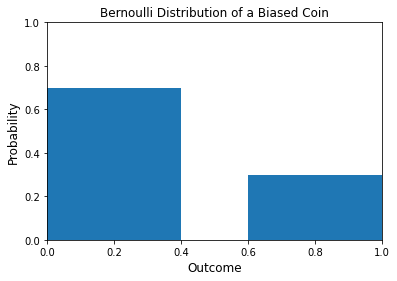

In [23]:
prob = np.array ([ 0.7 , 0.3])
side = [0,1]
plt.bar (side, prob)
plt.title('Bernoulli Distribution of a Biased Coin', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
axes = plt.gca() # Get current axes
axes.set_ylim([0,1])
axes.set_xlim([0,1])

Uniform Distribution
--------------------------------

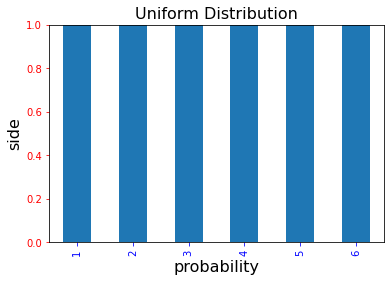

In [27]:
# having equal probability of occurance
#Rolling a dice

# Skewed pictorial representation 

prod = 1/6 * 6
sides = [1,2,3,4,5,6]
x = pd.Series(prod,sides)

#Set descriptions:
plt.title("Uniform Distribution",fontsize=16)
plt.ylabel('side', fontsize=16)
plt.xlabel('probability',fontsize=16)

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
ax.set_ylim([0,1])

#Plot the data:
x.plot(kind = 'bar')


------------------------
Binomial Distribution
------------------
Tossing a coin certain number of times

Text(0.5, 1.0, 'Binomial Distribution')

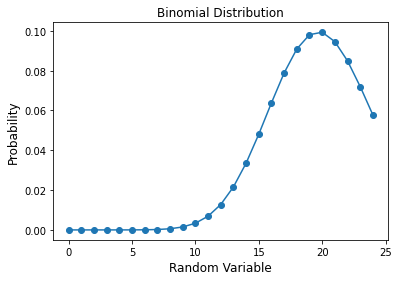

In [34]:
# Binomial Distribution
#probability mass Function:: In probability and statistics, a probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value. 

x =np.arange(0,25)
prob =0.2
p = 100   # shape parameter
bi_nom = stats.binom.pmf(x,p,prob)
plt.plot(x, bi_nom, '-o')
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Binomial Distribution")

In [0]:
-------------
Gaussian Distribution
------------------

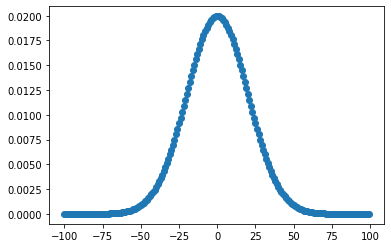

In [35]:
#### all continious function mostly take is kind of distribution :: eg peoples height
##theory :: mean (mu) (+-) sigma() -- #covers value of distribution upto 65% , mean (mu) (+-) 2* sigma() :: #covers value of distribution upto 95%, 
##mean (mu) (+-) 3* sigma() :: #covers value of distribution upto 99.7%

n = np.arange(-100, 100)
mean = 0
p = 20 #shape parameter

normal = stats.norm.pdf(n,mean,p)
plt.plot(n , normal, "o")
plt.show()

-------------------
Poisson Distribution
-------------------------

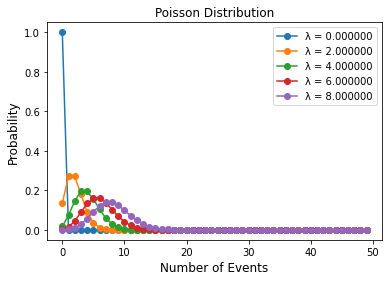

In [46]:
# n = number of events, lambd = expected number of events which can take place in a period
# The Poisson distribution is the discrete probability distribution of the number of events 
# occurring in a given time period, given the average number of times the event occurs over that time period.
n = np.arange(0, 50)
for Lambda in range(0,10,2):  
    poisson = stats.poisson.pmf(n, Lambda)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(Lambda))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution")
    plt.legend()

Exponential Distribution
-------------------
learning Link :https://youtu.be/8M_VRCc9rMY

To model the behaviour of units, that have constant failure rate
mean (mu ) = 1/lambda  = S.D

lambda = failure rate 

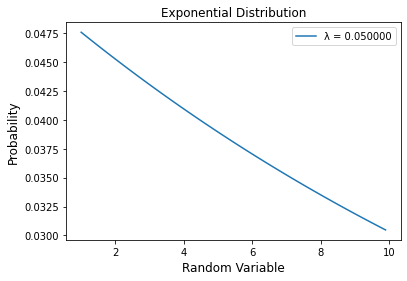

In [51]:
Lambda = 0.05
x= np.arange(1,10, 0.1)
y = Lambda * np.exp( -Lambda *x)
plt.plot(x,y,  label="λ = {:f}".format(Lambda))
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Exponential Distribution")
plt.legend()


